In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [3]:
df = pd.read_csv("grades_Data.csv")
df

,Time_to_Study,Grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8
5,9,3.9
6,6,2.9
7,12,4.5
8,11,4.3
9,2,1.8


In [8]:
input = df.iloc[:,:-1]
input

,Time_to_Study
0,1
1,5
2,7
3,3
4,2
5,9
6,6
7,12
8,11
9,2


In [6]:
output = df.iloc[:,-1]
output

0     1.5
1     2.7
2     3.1
3     2.1
4     1.8
5     3.9
6     2.9
7     4.5
8     4.3
9     1.8
10    2.4
11    3.5
12    4.8
13    3.9
14    5.0
15    4.1
16    2.9
17    4.5
18    1.5
19    2.4
20    5.0
21    4.1
22    4.3
23    2.4
24    2.7
25    3.5
26    1.5
27    1.8
28    2.1
29    3.1
30    3.5
31    5.0
32    3.1
33    3.5
34    1.5
35    1.8
36    2.1
37    2.4
38    2.7
39    2.9
40    3.1
41    3.5
42    3.9
43    4.1
44    4.3
45    4.5
46    4.8
47    5.0
48    3.5
49    1.8
Name: Grades, dtype: float64

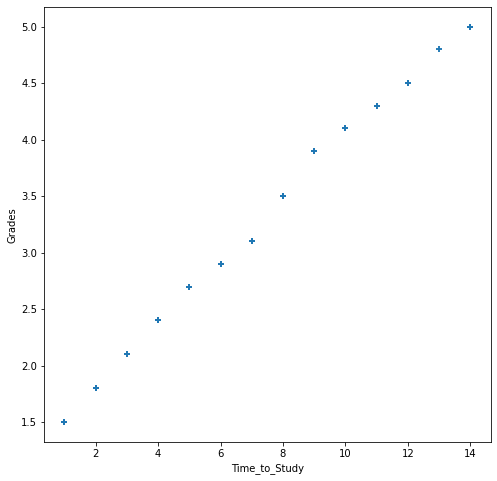

In [11]:
plt.figure(figsize=[8,8])
plt.scatter(df.Time_to_Study,df.Grades,marker="+")
plt.xlabel("Time_to_Study")
plt.ylabel("Grades")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.3,random_state=10) 

In [16]:
x_train

,Time_to_Study
21,10
35,2
27,2
18,1
31,14
1,5
12,13
34,1
45,12
26,1


In [17]:
y_train

21    4.1
35    1.8
27    1.8
18    1.5
31    5.0
1     2.7
12    4.8
34    1.5
45    4.5
26    1.5
5     3.9
13    3.9
22    4.3
19    2.4
17    4.5
14    5.0
4     1.8
41    3.5
33    3.5
24    2.7
11    3.5
38    2.7
16    2.9
48    3.5
46    4.8
49    1.8
8     4.3
43    4.1
29    3.1
25    3.5
28    2.1
0     1.5
15    4.1
36    2.1
9     1.8
Name: Grades, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.predict(x_test)

array([2.37255814, 2.37255814, 4.2947907 , 3.7455814 , 5.11860465,
       5.11860465, 2.09795349, 3.47097674, 4.56939535, 2.92176744,
       2.92176744, 3.19637209, 3.19637209, 3.19637209, 2.37255814])

In [20]:
model.score(x_test,y_test)

0.9930939473914451

In [27]:
print("intercept is",model.intercept_)
print("cooefficient is",model.coef_)

intercept is 1.2741395348837203
cooefficient is [0.27460465]


In [38]:
a = model.predict(x_test)
a

array([2.37255814, 2.37255814, 4.2947907 , 3.7455814 , 5.11860465,
       5.11860465, 2.09795349, 3.47097674, 4.56939535, 2.92176744,
       2.92176744, 3.19637209, 3.19637209, 3.19637209, 2.37255814])

In [34]:
from sklearn.metrics import r2_score
square = r2_score(y_test,a)
square

0.9930939473914452

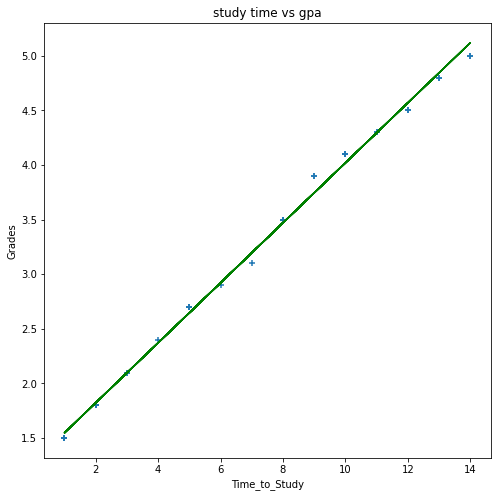

In [45]:
plt.figure(figsize=[8,8])
plt.scatter(x_train,y_train,marker="+")
plt.plot(x_train,model.predict(x_train),color="green")
plt.title("study time vs gpa")
plt.xlabel("Time_to_Study")
plt.ylabel("Grades")
plt.show()

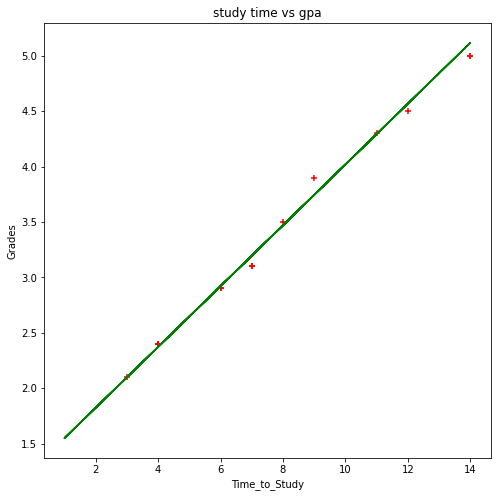

In [46]:
plt.figure(figsize=[8,8])
plt.scatter(x_test,y_test,marker="+",color="red")
plt.plot(x_train,model.predict(x_train),color="green")
plt.title("study time vs gpa")
plt.xlabel("Time_to_Study")
plt.ylabel("Grades")
plt.show()